## Instructions before using Jupyter Notebook

    1.You will see a series of cells in the notebook. Each cell can contain code, text, or images.

    2. To run a cell, click on it to select it, and then press the "Shift" and "Enter" keys at the same time. Alternatively, you can click on the "Run" button in the toolbar at the top of the notebook.

    3. The output of the cell will be displayed below the code. If the cell contains text, the text will be displayed below the cell.

    4. Once the cell has finished running, the next cell will be selected automatically. You can also select the next cell manually by clicking on it.

    5. If you want to re-run a cell, simply click on it to select it, and then press "Shift" and "Enter" again.

    6. If you want to run all the cells in the notebook at once, click on "Cell" in the toolbar at the top of the notebook, and then select "Run All" from the dropdown menu. This will run all the cells in order.

    7. If you encounter an error while running a cell, you will see a red error message displayed below the cell. You can try to fix the error and then re-run the cell.

    8. Once you have finished running all the cells in the notebook, you can close the notebook by clicking on "File" in the toolbar, and then selecting "Close and Halt" from the dropdown menu. This will close the notebook and shut down the Jupyter Notebook server.
    9. In this case, please stop as 'Stop Here'

In [1]:
pip install bio --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from Bio import Entrez
from Bio import SeqIO
import os
import glob
from PyQt5 import Qt

from Bio.Seq import reverse_complement as RC
import re

import subprocess

### Enter your email address in the following cell

In [3]:
Entrez.email = "sookhim.chan@atilabiosystems.com"

### 1. Please choose your species list txt file.
### 2. Please choose your destination folder for storing fasta sequence .
    Please use 'select folder' button instead of double clicking on it.
    
    a window will pop up in this step

In [6]:
app = Qt.QApplication([])
target_list_path = Qt.QFileDialog.getOpenFileName(None,'Choose the species List')[0]
dest_folder = Qt.QFileDialog.getExistingDirectory(None, "Select Destination Folder")
app.quit()
del app

dest_folder = dest_folder + '/'
print(target_list_path)
print(dest_folder)

C:/Users/atila/Desktop/rsvv4/list.txt
C:/Users/atila/Desktop/rsvv4/


### 3. Please copy your keyword for each species.
    keyword=species+'[title] AND complete genome[title] '+filter+'[filter]
   https://www.ncbi.nlm.nih.gov/nucleotide/
    
    Consider Neisseria gonorrhoeae as an example.
    1. Click NCBI web link -> 
    2. Enter keyword 'Neisseria gonorrhoeae complete genome' -> 
    3. Click 'search' button -> 
    4. feel free to set up sequence length accordingly -> 
    5. Get your key word in 'search details' Copy details as variable 'keyword'.
    
    
   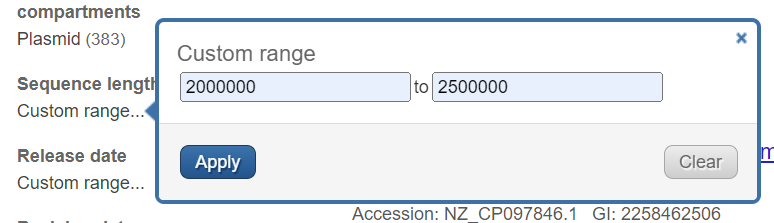
   
   
   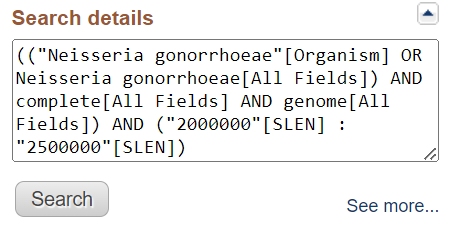
    

In [7]:
#keyword=species+'[title] AND complete genome[title] '+filter+'[filter]'
keyword='''
(("Human orthopneumovirus"[Organism] OR Human orthopneumovirus[All Fields]) AND genome[All Fields] AND strain[All Fields] AND RSVA[All Fields]) AND (complete[All Fields] AND genome[All Fields]) NOT unverified[All Fields]'''
print (keyword)
#raise NotImplementedError


(("Human orthopneumovirus"[Organism] OR Human orthopneumovirus[All Fields]) AND genome[All Fields] AND strain[All Fields] AND RSVA[All Fields]) AND (complete[All Fields] AND genome[All Fields]) NOT unverified[All Fields]


In [9]:
specieslist=open(target_list_path,"r").readlines()

In [7]:
specieslist=open(target_list_path,"r").readlines()
for species in specieslist:
    filter=species[:-1].split(",")[1]
    species=species[:-1].split(",")[0]
    
    print ("searching for..."+species)
    if not os.path.exists(dest_folder+species):
        os.makedirs(dest_folder+species)
    if len(glob.glob(dest_folder+species+"\\*.txt"))>10:
        lastpoint=len(glob.glob(dest_folder+species+"\\*.txt"))-2
    else:
        lastpoint=0
        
    print (keyword)
    search=Entrez.esearch(db="nucleotide",term=keyword)
    result=Entrez.read(search)
    print (result["Count"])
    print (len(glob.glob(dest_folder+species+"\\*.txt"))," is done")
    max=result["Count"]
    search=Entrez.esearch(db="nucleotide",term=keyword,retmax=max)
    result=Entrez.read(search)
    
    for n in range(0,len(result['IdList'])):
        try:
            idnumber=result['IdList'][n]
            seqhandle=Entrez.efetch(db="nucleotide",rettype="fasta",retmode="text",id=idnumber)
            seq=SeqIO.read(seqhandle,'fasta')
            print (seq.description,"\t",)
            if 'complete' in seq.description.lower():
                print ("saving...","\t",)
                nametag=seq.description[seq.description.rfind("|")+1:].replace(",","").replace("/","").replace(":","")
                if len(nametag)>100:
                    nametag=nametag[:100]
                outfile=open(dest_folder+species+"\\"+nametag+".txt","w")
                outfile.write(">"+nametag+"\n")
                outfile.write(str(seq.seq)+"\n")
                outfile.close()
                print ("saved")
            else:
                print ("skipped")
        except:
            continue

searching for...Human respiratory syncytial virus

(("Human orthopneumovirus"[Organism] OR Human orthopneumovirus[All Fields]) AND genome[All Fields] AND strain[All Fields] AND RSVA[All Fields]) AND (complete[All Fields] AND genome[All Fields]) NOT unverified[All Fields]
633
0  is done
MH828502.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva12/2015, complete genome 	
saving... 	
saved
MH828501.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva11/2013, complete genome 	
saving... 	
saved
MH828500.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva10/2013, complete genome 	
saving... 	
saved
MH828499.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva9/2015, complete genome 	
saving... 	
saved
MH828498.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva8/2015, complete genome 	
saving... 	
saved
MH828497.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva7/2015, complete genome 	
saving... 	
saved
MH828496.1 Human orthopneumovirus strain RSVA/Vietnam/vzrsva6/2014, complete genome 	


MG642033.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_265/1994, complete genome 	
saving... 	
saved
MG642032.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_221/1980, complete genome 	
saving... 	
saved
MG642031.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_236/1982, complete genome 	
saving... 	
saved
MG642030.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_256/1988, complete genome 	
saving... 	
saved
MG642028.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_220/1980, complete genome 	
saving... 	
saved
MG642026.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_233/1982, complete genome 	
saving... 	
saved
MG642024.1 Human respiratory syncytial virus A strain RSVA/Homo sapiens/USA/MCRSV_223/1981, complete genome 	
saving... 	
saved
KJ672446.2 Human orthopneumovirus strain RSVA/Homo sapiens/USA/LA2_27/2012, complete genome 	
saving... 

KX765896.1 Human orthopneumovirus strain RSVA/Homo sapiens/NZL/LJRSV81/2011, complete genome 	
saving... 	
saved
KX765894.1 Human orthopneumovirus strain RSVA/Homo sapiens/NZL/LJRSV84/2011, complete genome 	
saving... 	
saved
KX765891.1 Human orthopneumovirus strain RSVA/Homo sapiens/NZL/LJRSV44/2013, complete genome 	
saving... 	
saved
KX765887.1 Human orthopneumovirus strain RSVA/Homo sapiens/NZL/LJRSV05/2015, complete genome 	
saving... 	
saved
KX765886.1 Human orthopneumovirus strain RSVA/Homo sapiens/NZL/LJRSV01/2015, complete genome 	
saving... 	
saved
KX655699.1 Human orthopneumovirus strain RSVA/Homo sapiens/JOR/D3332/2012, complete genome 	
saving... 	
saved
KX655697.1 Human orthopneumovirus strain RSVA/Homo sapiens/JOR/A0417/2012, complete genome 	
saving... 	
saved
KX655696.1 Human orthopneumovirus strain RSVA/Homo sapiens/JOR/C2121/2011, complete genome 	
saving... 	
saved
KX655695.1 Human orthopneumovirus strain RSVA/Homo sapiens/JOR/C2354/2012, complete genome 	
saving...

KU950667.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10104/2012, complete genome 	
saving... 	
saved
KU950666.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10657/2013, complete genome 	
saving... 	
saved
KU950664.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10110/2012, complete genome 	
saving... 	
saved
KU950661.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10183/2012, complete genome 	
saving... 	
saved
KU950660.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10255/2012, complete genome 	
saving... 	
saved
KU950658.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10146/2012, complete genome 	
saving... 	
saved
KU950655.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10293/2012, complete genome 	
saving... 	
saved
KU950654.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10065/2012, complete genome 	
saving... 	
saved
KU950653.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10204/2012, complete g

KU950527.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10533/2013, complete genome 	
saving... 	
saved
KU950524.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10094/2012, complete genome 	
saving... 	
saved
KU950523.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10656/2014, complete genome 	
saving... 	
saved
KU950522.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10117/2012, complete genome 	
saving... 	
saved
KU950521.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10149/2012, complete genome 	
saving... 	
saved
KU950520.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10531/2013, complete genome 	
saving... 	
saved
KU950519.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10629/2013, complete genome 	
saving... 	
saved
KU950518.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10536/2013, complete genome 	
saving... 	
saved
KU950513.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/TH_10173/2012, complete g

KU316140.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/78I-046A-01-01/1978, complete genome 	
saving... 	
saved
KU316139.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/94I-091A-01-01/1994, complete genome 	
saving... 	
saved
KU316138.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/87E-083-01/1987, complete genome 	
saving... 	
saved
KU316137.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/79E-040-01/1979, complete genome 	
saving... 	
saved
KU316135.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/81I-090A-01-01/1981, complete genome 	
saving... 	
saved
KU316133.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/90E-035-01/1990, complete genome 	
saving... 	
saved
KU316131.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/94I-057A-01-01/1994, complete genome 	
saving... 	
saved
KU316126.1 Human orthopneumovirus strain RSVA/Homo sapiens/USA/84E-039-01/1984, complete genome 	
saving... 	
saved
KU316125.1 Human orthopneumovirus strain RSVA/Homo sapie

KP258741.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/90E-112-01/1990, complete genome 	
saving... 	
saved
KP258740.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/93E-065-01/1993, complete genome 	
saving... 	
saved
KP258737.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/84E-016-01/1984, complete genome 	
saving... 	
saved
KP258734.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/89E-024-01/1989, complete genome 	
saving... 	
saved
KP258733.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/84E-004-01/1984, complete genome 	
saving... 	
saved
KP258732.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/91E-597-01/1991, complete genome 	
saving... 	
saved
KP258730.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/87P-615-01/1987, complete genome 	
saving... 	
saved
KP258729.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/90P-147-01/1990, complete genome 	
sa

KJ672439.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_02/2012, complete genome 	
saving... 	
saved
KJ672437.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_99/2013, complete genome 	
saving... 	
saved
KJ672435.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_37/2012, complete genome 	
saving... 	
saved
KJ672434.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_53/2013, complete genome 	
saving... 	
saved
KJ672433.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_95/2013, complete genome 	
saving... 	
saved
KJ672432.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_72/2013, complete genome 	
saving... 	
saved
KJ672431.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_14/2012, complete genome 	
saving... 	
saved
KJ672429.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/USA/LA2_69/2013, complete genome 	
saving... 	
saved
KJ672428.1 Human

KJ627303.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9106/2010, complete genome 	
saving... 	
saved
KJ627301.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9262/2010, complete genome 	
saving... 	
saved
KJ627300.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLA7447/2009, complete genome 	
saving... 	
saved
KJ627298.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9214/2010, complete genome 	
saving... 	
saved
KJ627297.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9956/2010, complete genome 	
saving... 	
saved
KJ627296.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9488/2010, complete genome 	
saving... 	
saved
KJ627295.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE8150/2010, complete genome 	
saving... 	
saved
KJ627294.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/PER/FLE9761/2010, complete genome 	
saving... 	
saved
KJ627293

KF530261.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/DEU/106/2008, complete genome 	
saving... 	
saved
KF530260.1 Human respiratory syncytial virus strain RSVA/Homo sapiens/ARG/170/2005, complete genome 	
saving... 	
saved
KF530269.1 Human respiratory syncytial virus strain RSVA/Hep2_lab/USA/629-Q0030_RSV60/2009, complete genome 	
saving... 	
saved
JX627336.1 Human respiratory syncytial virus strain RSVA/GN435/11, complete genome 	
saving... 	
saved
JX069803.1 Human respiratory syncytial virus strain RSVA/human/USA/A2000-03-04/2000, complete genome 	
saving... 	
saved
JX069802.1 Human respiratory syncytial virus strain RSVA/human/USA/A1998-12-21/1998, complete genome 	
saving... 	
saved
JX069801.1 Human respiratory syncytial virus strain RSVA/human/USA/A1998-03-02/1998, complete genome 	
saving... 	
saved
JX069800.1 Human respiratory syncytial virus strain RSVA/human/USA/A1997-12-35/1997, complete genome 	
saving... 	
saved
JX069799.1 Human respiratory syncytial virus 

### 4. After downloading sequences for database, copy them into one fasta file
### 5. Create data base
### 6. Run blastn commandline
    Please paste all the query into _local_blast folder. Make sure you have a folder in your previous dest_folder.
    In this dest_folder, you may contain 2 categroies of folders now: "Your species", "Your_species_query_and_primers"

In [10]:
app = Qt.QApplication([])
primers_txt_name = Qt.QFileDialog.getOpenFileName(None,'Choose the Primers List')[0]
query_file = Qt.QFileDialog.getOpenFileName(None, "Select your query file")[0]
app.quit()
del app

print(primers_txt_name)
print(query_file)

#raise NotImplementedError

C:/Users/atila/Desktop/rsvv4/query_and_primers/RSV primer V4.txt
C:/Users/atila/Desktop/rsvv4/query_and_primers/query.txt


In [11]:
for species in specieslist:
    species = species[:-1].split(",")[0]
    src_folder = dest_folder + species
    dest_folder_local_blast = dest_folder + species + "_local_blast"
    os.chdir(src_folder)
    os.makedirs(dest_folder_local_blast)
    subprocess.run(["cmd", "/c", "copy", "*.txt", f"{dest_folder_local_blast}\\all.txt"])
    
    os.chdir(dest_folder_local_blast)
    subprocess.run(["cmd", "/c", "makeblastdb", "-in", "all.txt", "-dbtype", "nucl", "-parse_seqids"])
    
    db = "all.txt"
    query = f"{query_file}"
    output = "query_results.txt"
    outfmt = "3"
    qcov_hsp_perc = "90"
    max_target_seqs = "30000"
    max_hsps = "1"
    perc_identity = "90"

    subprocess.run(["cmd", "/c", "blastn", "-db", db, "-query", query, "-out", output, "-outfmt", outfmt, 
                    "-qcov_hsp_perc", qcov_hsp_perc, "-max_target_seqs", max_target_seqs, "-max_hsps", max_hsps, 
                    "-perc_identity", perc_identity], check=True)
    
    query_lst = []
    fin = open(f"{dest_folder_local_blast}\\{output}","r").readlines()
    for l in fin:
        if "Query=" in l:
            name = l[l.find(" ")+1:-1]
            try:
                out.close()
                out = open(f"{dest_folder_local_blast}\\" + name + ".txt", "w")
                query_lst.append(name)
            except:
                out = open(f"{dest_folder_local_blast}\\" + name + ".txt", "w")
                query_lst.append(name)
        try:
            out.write(l)
        except:
            pass
    out.close()
    
    db = "all.txt"
    query = f"{query_file}"
    output = "query_results_for_count.txt"
    outfmt = "4"
    qcov_hsp_perc = "90"
    max_target_seqs = "30000"
    max_hsps = "1"
    perc_identity = "90"

    subprocess.run(["cmd", "/c", "blastn", "-db", db, "-query", query, "-out", output, "-outfmt", outfmt, 
                    "-qcov_hsp_perc", qcov_hsp_perc, "-max_target_seqs", max_target_seqs, "-max_hsps", max_hsps, 
                    "-perc_identity", perc_identity], check=True)
    
    query_lst_count = []
    fin = open(f"{dest_folder_local_blast}/{output}","r").readlines()
    for l in fin:
        if "Query=" in l:
            name = l[l.find(" ")+1:-1]
            try:
                out.close()
                out = open(f"{dest_folder_local_blast}\\" + name + "_count.txt", "w")
                query_lst_count.append(f"{name}_count")
            except:
                out = open(f"{dest_folder_local_blast}\\" + name + "_count.txt", "w")
                query_lst_count.append(f"{name}_count")
        try:
            out.write(l)
        except:
            pass
    out.close()

### 7. Use “inclusivity python code” to summarize the alignment of all primers for each accession number

In [12]:
print(query_lst, query_lst_count)

['RSVA primer perfect sequence', 'RSVB primer perfect sequence', 'SeracarePerfect sequence'] ['RSVA primer perfect sequence_count', 'RSVB primer perfect sequence_count', 'SeracarePerfect sequence_count']


In [13]:
def inclusivity_python_code(query, primers_txt_name, dest_folder_local_blast):
    infile = open(f"{dest_folder_local_blast}/{query}.txt","r").readlines()
    primerfile = open(primers_txt_name,"r").readlines()
    out = open(f"{dest_folder_local_blast}/{query}.csv","w")
    out.write("Accession,")
    ids = [""]
    
    try:

        for line in infile[5:]:

            while "  " in line:
                line = line.replace("  "," ")
            if line != "\n" and "Query" not in line:
                #print(line)
                try:
                    name = line.split(" ")[0]
                    ids.append(name)
                    vars()[name+"_n"] = 0
                    vars()[name] = ""
                except:
                    pass
            if "Query" in line:
                ids[0] = line.split("_")[0]
                if line.split("_")[0] == "Query":
                    Query_n = 0
                    Query = ""
                break

        cycle = 0
        started = 0
        for line in infile[len(ids) + 7:]:
            #print (line)
            if line[0:6] == "Query_":
                l = line
                while "  " in l:
                    l = l.replace("  "," ")
                sp = l.split(" ")
                seqstart = line.find(sp[2])
                repeat = []
                #print (seqstart)
            if line == "\n":
                cycle = 0
                repeat = []
                for id in ids:
                    #print(id,vars()[id+"_n"])
                    if vars()[id+"_n"] == 0 and started != 0:
                        vars()[id] += (" " * 60)
                    vars()[id+"_n"] = 0

            elif line[0:6] == "Query_":
                started = 1
                seq = line[seqstart:line.rfind(" ") - 1].upper()
                #print (line[:line.find(" ")])
                if line[:line.find("_")] not in repeat:
                    repeat.append(line[:line.find("_")])
                    if line.split("_")[0] == "Query":
                        Query_n = 1
                        Query += seq
                    cycle = 1

            elif cycle == 1:
                started = 1
                seq = line[seqstart:line.rfind(" ") - 1].upper()
                #print (line[:line.find(" ")])
                if line[:line.find(" ")] not in repeat:
                    repeat.append(line[:line.find(" ")])
                    vars()[line[:line.find(" ")]] += seq
                    vars()[line[:line.find(" ")] + "_n"] = 1
                    cycle = 1
        #print (Query)

        primer = []
        primer_name_list = []
        for primerline in primerfile:
            if ">" not in primerline:
                primer_in_line = ""
                for ch in primerline:
                    if ch.isalpha():
                        primer_in_line = primer_in_line + ch
                primer.append(primer_in_line.upper())
            else:
                out.write(primerline.strip().replace("\n","").replace(" ", "") + ",")
                primer_name_list.append(primerline.strip())

        out.write("\n")
        p_pos = []
        for pseq in primer:
            p_temp = ""
            p_temp_RC = ""
            for nt in pseq:
                p_temp = p_temp + nt + "-*"
            for nt in RC(pseq):
                p_temp_RC = p_temp_RC + nt + "-*"
                
            p_temp = p_temp[0:-2]
            p_temp_RC = p_temp_RC[0:-2]
            
            search1 = re.search(p_temp,Query)
            search2 = re.search(p_temp_RC,Query)
            if search1 != None:
                p_pos.append([search1.start(),search1.end()])
            elif search2 != None:
                p_pos.append([search2.start(),search2.end()])
            else:
                p_pos.append([])


        for id in ids:
            s = vars()[id]
            out.write(id + ",")
            for i in range(len(primer_name_list)):
                try:
                    p = s[p_pos[i][0]:p_pos[i][1]]
                except:
                    p = ""
                out.write(p + ",")
            out.write("\n")
        out.close()
        
        return primer_name_list
    
    except:
        out.close()

In [14]:
for query in query_lst:
    primer_name_list = inclusivity_python_code(query, primers_txt_name, dest_folder_local_blast)
    
print(primer_name_list)

['>SK_RSV_M_KF', '>SK_RSV_M_KF2', '>SK_RSV_M_KB', '>SK_RSVA_M_KB', '>SK_RSV_M_LF_2', '>SK_RSVA_M_LB', '>SK_RSVB_M_LB', '>SK_RSV_LB_seraPerfect', '>SK_RSV_F1C_seraPerfect', '>SK_RSVA_M_F1c_m1', '>SK_RSVB_M_F1c_m1', '>SK_RSV_F2_seraPerfect', '>SK_RSVA_M_F2_m1', '>SK_RSVB_M_F2_m1', '>SK_RSV_B1C_seraPerfect', '>SK_RSVB_M_B1c_m1', '>SK_RSV_B2_seraPerfect', '>SK_RSVA_M_B2_m1', '>SK_RSVB_M_B2_m1', '>SK_RSVA_M_B1c_m1']


In [15]:
for query_count in query_lst_count:
    primer_name_list_count = inclusivity_python_code(query_count, primers_txt_name, dest_folder_local_blast)
    
print(primer_name_list_count)

['>SK_RSV_M_KF', '>SK_RSV_M_KF2', '>SK_RSV_M_KB', '>SK_RSVA_M_KB', '>SK_RSV_M_LF_2', '>SK_RSVA_M_LB', '>SK_RSVB_M_LB', '>SK_RSV_LB_seraPerfect', '>SK_RSV_F1C_seraPerfect', '>SK_RSVA_M_F1c_m1', '>SK_RSVB_M_F1c_m1', '>SK_RSV_F2_seraPerfect', '>SK_RSVA_M_F2_m1', '>SK_RSVB_M_F2_m1', '>SK_RSV_B1C_seraPerfect', '>SK_RSVB_M_B1c_m1', '>SK_RSV_B2_seraPerfect', '>SK_RSVA_M_B2_m1', '>SK_RSVB_M_B2_m1', '>SK_RSVA_M_B1c_m1']


### Stop Here

### 8. Summarize the alignment of all primers for each accession number

In [16]:
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search

In [17]:
df_lst = []
for query in query_lst:
    query_df = pd.read_csv(f'{dest_folder_local_blast}/{query}.csv')
    df_lst.append(query_df.copy().iloc[:, 0:len(primer_name_list)+1])
    
df_count_lst = []
for query_count in query_lst_count:
    query_df = pd.read_csv(f'{dest_folder_local_blast}/{query_count}.csv')
    df_count_lst.append(query_df.copy().iloc[:, 0:len(primer_name_list)+1])

In [18]:
primer_dict = {'KF': [], 'KB': [], 'LF':[], 'LB':[], 'FIP':[], 'BIP':[]}
for primer in primer_name_list:
    if 'KF' in primer.upper():
        primer_dict['KF'].append(primer)
    elif 'KB' in primer.upper() or 'KR' in primer.upper():
        primer_dict['KB'].append(primer)
    elif 'LF' in primer.upper():
        primer_dict['LF'].append(primer)
    elif 'LB' in primer.upper():
        primer_dict['LB'].append(primer)
    elif 'F1C' in primer.upper():
        primer_dict['FIP'].append((primer,primer.replace('F1c', 'F2')))
    elif 'B1C' in primer.upper():
        primer_dict['BIP'].append((primer,primer.replace('B1c', 'B2')))
print(primer_dict)

{'KF': ['>SK_RSV_M_KF', '>SK_RSV_M_KF2'], 'KB': ['>SK_RSV_M_KB', '>SK_RSVA_M_KB'], 'LF': ['>SK_RSV_M_LF_2'], 'LB': ['>SK_RSVA_M_LB', '>SK_RSVB_M_LB', '>SK_RSV_LB_seraPerfect'], 'FIP': [('>SK_RSV_F1C_seraPerfect', '>SK_RSV_F1C_seraPerfect'), ('>SK_RSVA_M_F1c_m1', '>SK_RSVA_M_F2_m1'), ('>SK_RSVB_M_F1c_m1', '>SK_RSVB_M_F2_m1')], 'BIP': [('>SK_RSV_B1C_seraPerfect', '>SK_RSV_B1C_seraPerfect'), ('>SK_RSVB_M_B1c_m1', '>SK_RSVB_M_B2_m1'), ('>SK_RSVA_M_B1c_m1', '>SK_RSVA_M_B2_m1')]}


In [19]:
df_all_in_one_lst = []
index = 0
for df_count in df_count_lst:
    if (len(df_count) == 0):
        index+=1
        continue
        
    else:
        df_score = pd.DataFrame(columns=df_count.columns)
        df_count = df_count.astype(str)

        # Define a custom function that will be applied to the first row
        # This is a function to calculate the length of a primer
        def first_row_func(x):
            primer_length = 0
            for ch in x:
                if ch.isalpha() or ch == '.' or ch == '-':
                    primer_length += 1
            return primer_length

        # Apply the count function to the first row
        df_score.loc[0, :] = df_count.loc[0, :].apply(first_row_func)
        
        df_score.iloc[0, 0] = df_count.iloc[0, 0]

        # Get the length of each column in the first row
        primers_len = [df_score.loc[0, col] for col in df_score.columns]
        
        def count_mismatch(row, query_seq):        
            if (row=='nan'):
                return 1000
            
            mis_match = 0
            for i in range (0, min(len(row), len(query_seq))):
                if (query_seq[i] != row[i]):
                    if (query_seq[i] == 'R' and (row[i] == 'A' or row[i] == 'G')):
                        continue
                    elif (query_seq[i] == 'Y' and (row[i] == 'C' or row[i] == 'T')):
                        continue   
                    elif (query_seq[i] == 'S' and (row[i] == 'C' or row[i] == 'G')):
                        continue
                    elif (query_seq[i] == 'W' and (row[i] == 'A' or row[i] == 'T')):
                        continue
                    elif (query_seq[i] == 'K' and (row[i] == 'G' or row[i] == 'T')):
                        continue
                    elif (query_seq[i] == 'M' and (row[i] == 'A' or row[i] == 'C')):
                        continue
                    else:
                        mis_match += 1
                else:
                    continue
                    
                mis_match += abs(len(query_seq)-len(row))
                
            return mis_match

        for i in range (1, len(df_count)):
            lst = []
            # Add Accession number to the first place
            lst.append(df_count.iloc[i,0])
            
            for j in range(1, len(df_count.columns)):
                # Apply the custom function to the rest of the rows
                lst.append(count_mismatch(df_count.iloc[i, j],df_count.iloc[0,j]))
            
            # Concatenate list
            df_score.loc[i] = lst

        def total_mis(x):
            kick_F_mismatch = min([x[primer] for primer in primer_dict.get('KF')])
            kick_B_mismatch = min([x[primer] for primer in primer_dict.get('KB')])
            LF_mismatch = min([x[primer] for primer in primer_dict.get('LF')])
            LB_mismatch = min([x[primer] for primer in primer_dict.get('LB')])

            FIP_mismatch = min([(x[primer_tuple[0]]+ x[primer_tuple[1]]) for primer_tuple in primer_dict.get('FIP')])

            BIP_mismatch = min([(x[primer_tuple[0]]+ x[primer_tuple[1]]) for primer_tuple in primer_dict.get('BIP')])

            arr = np.array([kick_F_mismatch, FIP_mismatch, LF_mismatch, LB_mismatch, BIP_mismatch, kick_B_mismatch])
            return np.sum(arr)

        def essential_mis(x):
            LF_mismatch = min([x[primer] for primer in primer_dict.get('LF')])
            LB_mismatch = min([x[primer] for primer in primer_dict.get('LB')])

            FIP_mismatch = min([x[primer_tuple[0]]+ x[primer_tuple[1]] for primer_tuple in primer_dict.get('FIP')])

            BIP_mismatch = min([x[primer_tuple[0]]+ x[primer_tuple[1]] for primer_tuple in primer_dict.get('BIP')])
            arr = np.array([FIP_mismatch, LF_mismatch, LB_mismatch, BIP_mismatch])
            return np.sum(arr)

        df_score['Total_Mismatch'] = df_score.apply(lambda x : total_mis(x),axis=1)
        df_score['Essential_Mismatch'] = df_score.apply(lambda x : essential_mis(x),axis=1)
        
        all_in_one = pd.merge(df_lst[index], df_score, on = 'Accession', suffixes=('_sequence', ''))
        
        df_all_in_one_lst.append(all_in_one)
        
        index+=1
        
df_all_in_one_lst[0].head()
        
query_total_df = pd.concat(df_all_in_one_lst)
query_total_df.to_csv(f"{dest_folder_local_blast}/blast_score.csv", index=False)


In [20]:
df = query_total_df.iloc[:,0:len(primer_name_list)+1].groupby('Accession').apply(lambda x: x.ffill().bfill()).drop_duplicates()
df_score_total = query_total_df.iloc[:, [*range(1), *range(-(len(primer_name_list)+2), 0)]].groupby('Accession').min()

final_df = pd.merge(df, df_score_total, on="Accession")

final_df['Total_Mismatch'] = final_df.apply(lambda x : total_mis(x),axis=1)
final_df['Essential_Mismatch'] = final_df.apply(lambda x : essential_mis(x),axis=1)

final_df.to_csv(f"{dest_folder_local_blast}/merge_result.csv", index=False)
